In [3]:
### Classification part
install.packages("lattice")
install.packages("ggplot2")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Importing the dhfr data set

data(dhfr)

# Check to see if there are missing data?

sum(is.na(dhfr))


# To achieve reproducible model, set random seed number

set.seed(100)

[1] 0

In [14]:
# Perform stratified random split of the data set

TrainingIndex <- createDataPartition(dhfr$Y, p = 0.8, list = FALSE)
TrainingSet  <- dhfr[TrainingIndex, ]          # Training Set
TestingSet <- dhfr[-TrainingIndex, ]             # Testing Set



In [6]:
# Random forest


# Run normally without parallel processing
start.time <- proc.time()
Model <- train(Y ~ ., 
               data = TrainingSet,      # Build model using training set
               method = "rf"           # Learning algorithm
)
stop.time <- proc.time()
run.time <- stop.time - start.time
print(run.time)


   user  system elapsed 
111.803   0.073 112.457 


In [7]:
# Use doParallel

library(doParallel)

cl <- makePSOCKcluster(5)
registerDoParallel(cl)

start.time <- proc.time()
Model <- train(Y ~ ., 
               data = TrainingSet,   
               method = "rf"         
)
stop.time <- proc.time()
run.time <- stop.time - start.time
print(run.time)

stopCluster(cl)


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



   user  system elapsed 
  2.541   0.120  50.094 


In [23]:
registerDoSEQ()   # since stopCluster(cl) does not work we need to register for without parallel processing.

In [24]:
# Run normally without parallel processing


# Run normally without parallel processing
start.time <- proc.time()
Model <- train(Y ~ ., 
               data = TrainingSet,      # Build model using training set
               method = "rf"           # Learning algorithm
)
stop.time <- proc.time()
run.time <- stop.time - start.time
print(run.time)


   user  system elapsed 
107.030   0.088 107.723 


In [12]:
# Use doParallel

library(doParallel)

cl <- makePSOCKcluster(5)
registerDoParallel(cl)

start.time <- proc.time()
Model <- train(Y ~ ., 
               data = TrainingSet,   
               method = "rf",        
               tuneGrid = data.frame(mtry = seq(5,15, by = 5))
              )
stop.time <- proc.time()
run.time <- stop.time - start.time
print(run.time)

stopCluster(cl)

   user  system elapsed 
  2.051   0.087  37.510 


In [16]:
# Applying model for prediction

Model.training <- predict(Model, TrainingSet)

Model.training.confusion <- confusionMatrix(Model.training, TrainingSet$Y)

print(Model.training.confusion)

Confusion Matrix and Statistics

          Reference
Prediction active inactive
  active      163        4
  inactive      0       94
                                          
               Accuracy : 0.9847          
                 95% CI : (0.9612, 0.9958)
    No Information Rate : 0.6245          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9671          
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9592          
         Pos Pred Value : 0.9760          
         Neg Pred Value : 1.0000          
             Prevalence : 0.6245          
         Detection Rate : 0.6245          
   Detection Prevalence : 0.6398          
      Balanced Accuracy : 0.9796          
                                          
       'Positive' Class : active          
      

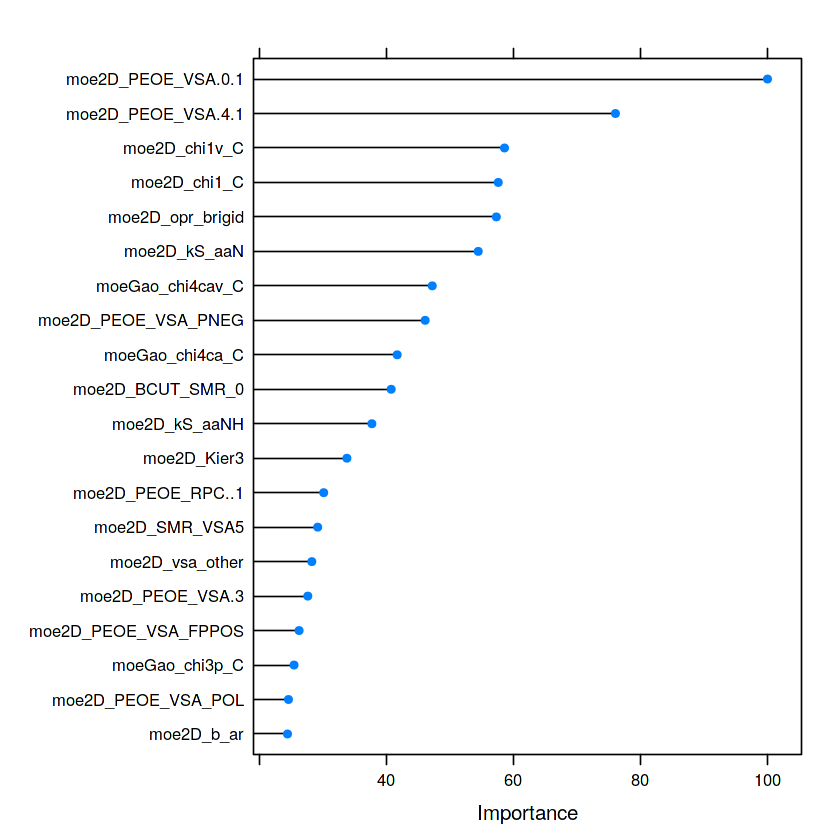

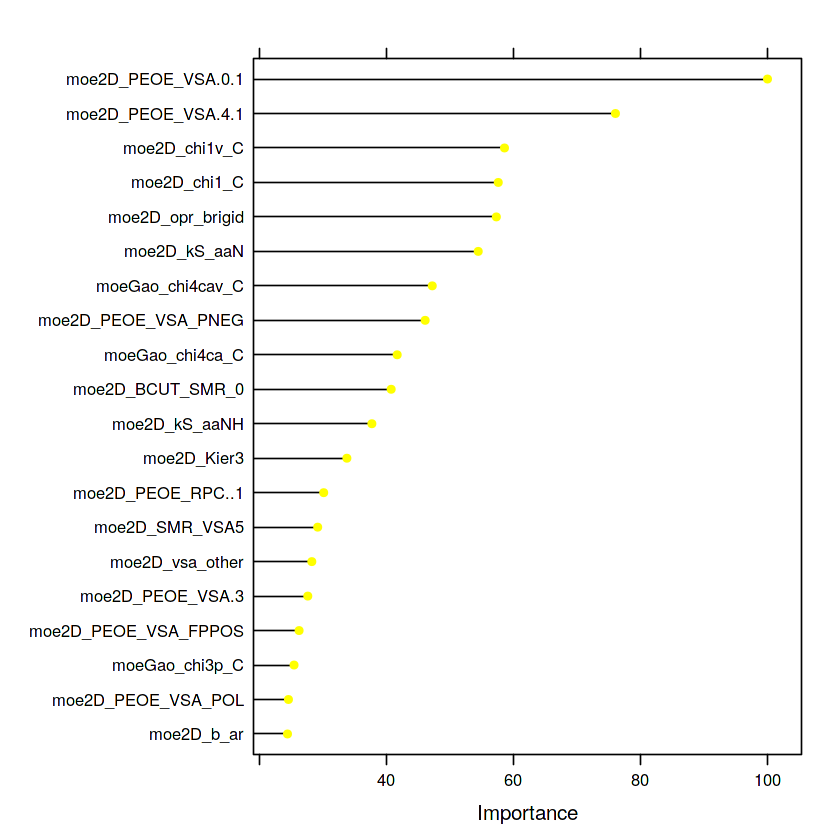

In [18]:
# Feature importance

Importance <- varImp(Model)
plot(Importance, top = 20)
plot(Importance, top = 20, col = "Yellow")